In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# lecture du fichier Excel
data = pd.read_excel('titanic3.xls')
#d = data

In [40]:
# avoir les dimension des donnees
data.shape

(1309, 14)

In [41]:
# avoir le nom des colonnes
data.columns 

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [42]:
# Éliminer les colonnes avec Pandas.drops(list)
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [9]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [10]:
# Avoir les statistique de base sur chaque colonne
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [11]:
# Éliminer des lignes contenant NAN
data = data.dropna(axis=0)

In [15]:
# compter le nombre d element dans une colonne
data['survived'].value_counts()

0    619
1    427
Name: survived, dtype: int64

<AxesSubplot: >

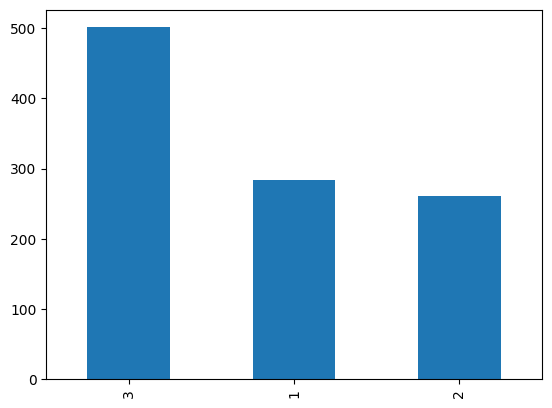

In [17]:
# on afficher sur un graphique avec Matplotlib.pyplot dans pandas
data['pclass'].value_counts().plot.bar()

In [21]:
# choisi les element par groupe
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [22]:
# Serie: est une tableau Numpy 1D + un axe d index
# DataFrame: est un assemblage de plusieurs series 
data['age'] # une Serie

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [26]:
# On peut changer la nom de nos index enfin de ne plus avoir des chiffres
data = d.set_index('name')
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

In [30]:
# DataFrame: est un dictionnaire de Serie
# DataFrame['columns'] = une Serie

data.set_index(np.arange(data.shape[0]), inplace=True)

data['age'][:10] # pour faire de l indexing

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [45]:
# cree un Maske contenant des boolean
mineur = data['age']<18 # tous les ages inférieurs a 18 ans
data[mineur]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64